In [1]:
from fastai.vision import *

In [2]:
directory = r'dataset'
path = Path(directory)

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['A', 'D', 'None']

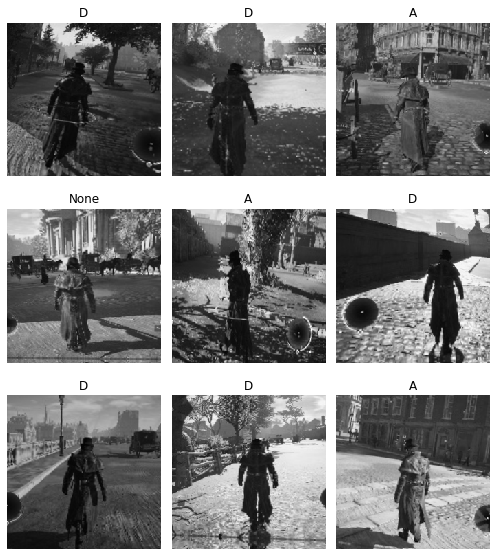

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,accuracy,time
0,1.182699,0.681488,0.694514,03:19
1,0.782119,0.534318,0.760349,02:55
2,0.615206,0.435705,0.810224,02:44
3,0.474108,0.323235,0.862594,02:47
4,0.385516,0.253830,0.898005,03:04
5,0.311062,0.196440,0.917955,03:11
6,0.270292,0.169702,0.932668,02:56
7,0.243117,0.152079,0.937656,02:46
8,0.213722,0.131357,0.943142,02:48
9,0.198510,0.118910,0.950374,02:44


In [8]:
learn.save('resnet-stage-2')

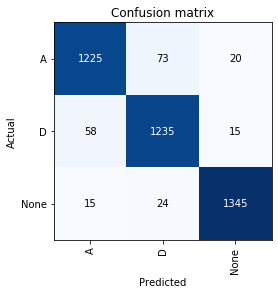

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


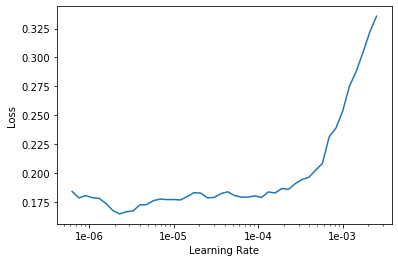

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, max_lr=slice(2e-6, 3e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.177782,0.111901,0.954613,03:29
1,0.167805,0.104821,0.956608,03:29


In [13]:
learn.save('resnet-unfreezed-lr-stage-2')

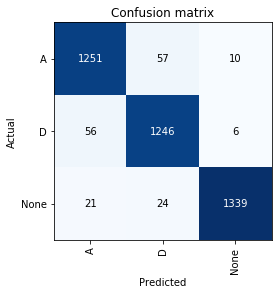

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.196961,0.152630,0.950125,03:26
1,0.183385,0.211085,0.923940,03:28
2,0.162188,0.137042,0.953117,03:25
3,0.124124,0.115174,0.957357,03:27
4,0.061468,0.057413,0.981795,03:28
5,0.032582,0.040837,0.988279,03:27
6,0.015144,0.027446,0.992269,03:28
7,0.008405,0.026464,0.992768,03:28


In [17]:
learn.save('resnet-unfreezed-stage-2')

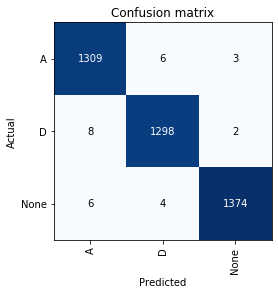

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [8]:
learn.load('resnet-unfreezed-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (16042 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
A,A,A,A,A
Path: dataset;

Valid: LabelList (4010 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
None,A,A,None,None
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU

In [10]:
learn.export()